In [1]:
%run init.ipy

from lib import constants

## Get some test data from VTRFormants ***TEST*** set

In [2]:
import random
from vtr.prior import formant
from lib import timit

def rand_triple():
    vtr_root = timit.test_set(timit.VTRFORMANTS)
    timit_root = timit.test_set(timit.TIMIT)
    l = list(timit.yield_file_triples(vtr_root, timit_root))
    return random.choice(l)

fb_file, phn_file, wav_file = rand_triple()

2022-12-18 23:52:48.083104: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory


In [3]:
d, fs = formant.read_wav_file_and_normalize(wav_file)
t = np.arange(len(d))/fs

from lib import klatt
klatt.play(t*1000., d)

**********ao**********


/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR4/MLLL0/SX373.WAV: Discarding vowel `ax` segment at sample indices 4052:4760: Praat gave only 2 < 3 valid formants
  warnings.warn(


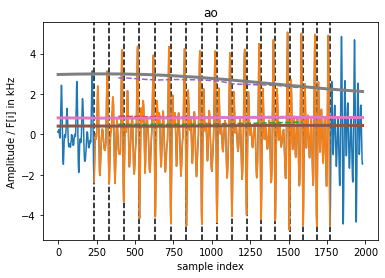

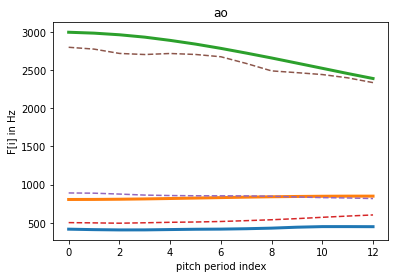

**********iy**********


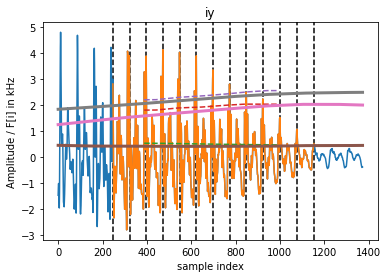

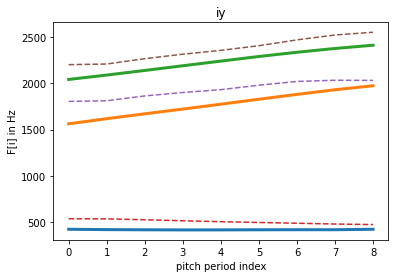

**********aa**********


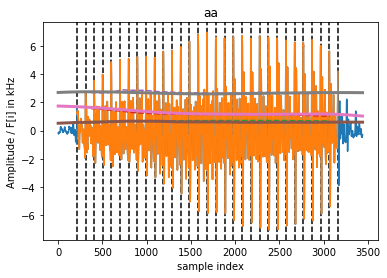

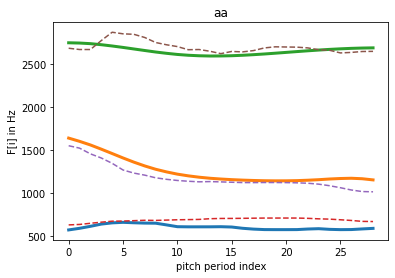

**********ix**********


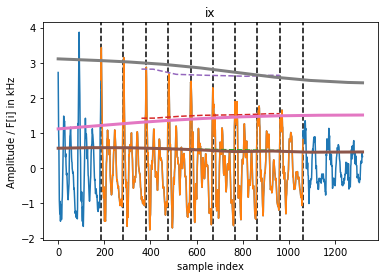

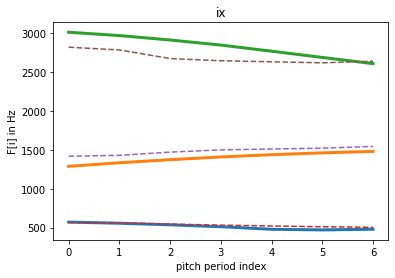

**********er**********


/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR4/MLLL0/SX373.WAV: Discarding vowel `ix` segment at sample indices 21300:21950: Praat only gave 3 < 4 pulses
  warnings.warn(
/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR4/MLLL0/SX373.WAV: Discarding vowel `ax` segment at sample indices 24250:25000: Praat only gave 3 < 4 pulses
  warnings.warn(


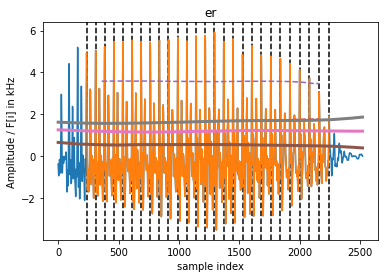

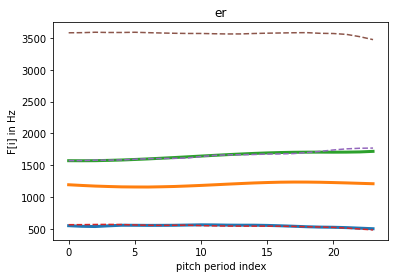

/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR4/MLLL0/SX373.WAV: Discarding vowel `iy` segment at sample indices 33913:34680: Praat gave only 2 < 3 valid formants
  warnings.warn(
/home/marnix/thesis/py/vtr/prior/formant.py:90: UserWarning: /home/marnix/thesis/py/../data/TIMIT/TEST/DR4/MLLL0/SX373.WAV: Discarding vowel `iy` segment at sample indices 36010:36454: segment too short for Praat's pulse estimation algorithm: To analyse this Sound, “minimum pitch” must not be less than 108.10810810810811 Hz.
Sound: pitch analysis not performed.
  warnings.warn(


**********ih**********


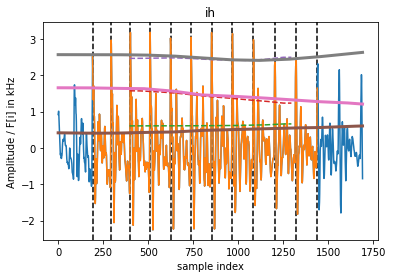

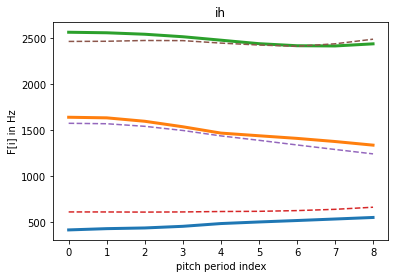

In [4]:
from lib import constants

for T_praat, F_true_periods, F_praat_periods, context in formant.yield_training_data(
        fb_file, phn_file, wav_file, return_full=True
    ):
    vowel = context['vowel']
    print("*"*10 + vowel + "*"*10)
    
    # Plot pulse estimates
    pulse_idx = context['pulse_idx']
    for pi in pulse_idx:
        axvline(pi, ls="--", color="black")
    first, last = pulse_idx[0], pulse_idx[-1]
    
    # Plot waveform
    segment = context['segment']
    plot(segment)
    plot(range(first, last), segment[first:last])
    
    # Plot formant tracks
    plot(context['F_praat_tracks']/1000, "--")
    plot(context['F_true_tracks']/1000, lw=3)
    ylabel("Amplitude / F[i] in kHz")
    xlabel("sample index")
    title(vowel)
    show()
    
    # Plot the distilled training data
    plot(F_true_periods, lw=3)
    plot(F_praat_periods, "--")
    ylabel("F[i] in Hz")
    xlabel("pitch period index")
    title(vowel)
    show()

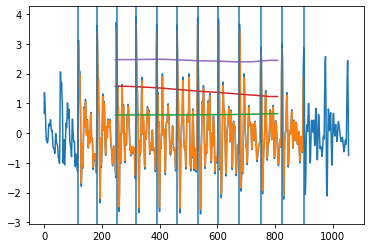

{'fulldata': array([ 0.66781002,  1.35962753,  1.12195981, ...,  1.49337093,
         0.77014205, -0.75382589]),
 'fullt': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.053e+02, 1.054e+02,
        1.055e+02]),
 'fs': 10000.0,
 'd': array([ 2.94121608e+00,  2.42074650e+00,  1.75119040e+00,  1.56603715e+00,
         1.95541747e+00,  1.44172577e+00,  1.00560716e+00,  7.79555843e-01,
        -4.88964188e-01, -1.56142037e+00, -1.69064573e+00, -9.66350724e-01,
        -3.59250206e-01, -6.72577833e-01, -1.12194460e+00, -1.05040645e+00,
        -7.25639947e-01, -1.97617093e-01,  2.72563962e-01,  6.46014472e-01,
         8.25730037e-01,  4.37515608e-01,  2.08679389e-01,  6.53650353e-01,
         1.06256385e+00,  9.67780917e-01,  4.85882303e-01,  2.67523027e-02,
        -7.68924743e-02, -1.22945496e-02,  3.41496520e-01,  4.18928215e-01,
        -2.85105992e-02, -3.97219723e-01, -4.68093491e-01, -1.78922201e-01,
         4.52971620e-02,  5.61391901e-02, -9.83531867e-02, -3.12927074e-01,
        

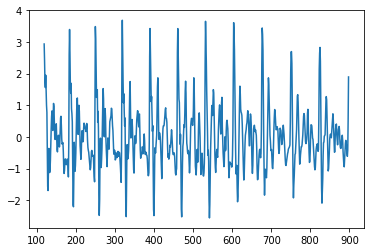

In [5]:
from inv.process import *

ret, c = process_data(
    segment, constants.TIMIT_FS_HZ, prepend=1, max_NP=30, return_full=True
)

plot(c['fulldata'])
plot(range(c['first'], c['last']), c['d'])
plot(c['reference_tracks']/1000)
for idx in c['pulse_estimate']: axvline(idx)
show()
plot(range(c['first'], c['last']), c['d'])
ret

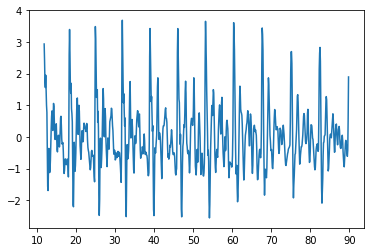

In [6]:
plot(ret['t'], ret['d'])

## Test prior bijector

In [7]:
from dgf.prior import source
from vtr.prior import filter

Test the noise sigma prior (bijector). We put a mean at -20 dB and floor it at the noise floor. Relative uncertainty is 100% leading to a nois power dB of roughly -20 +/- 7.5 dB.

(-21.08642287147282, 7.50949431232784)

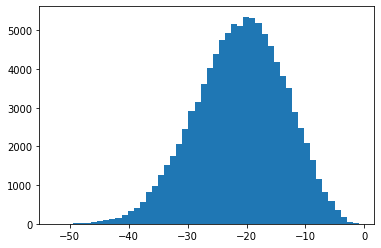

In [8]:
from inv import model

b = model.noise_sigma_bijector()

noise_sigmas = b.forward(randn(100000))

noise_power_dbs = 20*np.log10(noise_sigmas)

hist(noise_power_dbs, bins=50);

np.mean(noise_power_dbs), np.std(noise_power_dbs)

In [19]:
hyper = dict(
    meta = dict(
        noiseless_estimates = False,
        c = constants.BOUNDARY_FACTOR,
        rho = .5, # Peak picking
        inference_method = "nested_sampling",
        inference_method_options = {}
    ),
    data = ret,
    source = next(source._yield_all_configs()),
    filter = filter.AP(10, numpy_backend=jax.numpy, scipy_backend=jax.scipy)
)

hyper['source']['use_oq'] = True

model.ndim(hyper)

301

In [20]:
hyper

{'meta': {'noiseless_estimates': False,
  'c': 2.0,
  'rho': 0.5,
  'inference_method': 'nested_sampling',
  'inference_method_options': {}},
 'data': {'fulldata': array([ 0.66781002,  1.35962753,  1.12195981, ...,  1.49337093,
          0.77014205, -0.75382589]),
  'fullt': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 1.053e+02, 1.054e+02,
         1.055e+02]),
  'fs': 10000.0,
  'd': array([ 2.94121608e+00,  2.42074650e+00,  1.75119040e+00,  1.56603715e+00,
          1.95541747e+00,  1.44172577e+00,  1.00560716e+00,  7.79555843e-01,
         -4.88964188e-01, -1.56142037e+00, -1.69064573e+00, -9.66350724e-01,
         -3.59250206e-01, -6.72577833e-01, -1.12194460e+00, -1.05040645e+00,
         -7.25639947e-01, -1.97617093e-01,  2.72563962e-01,  6.46014472e-01,
          8.25730037e-01,  4.37515608e-01,  2.08679389e-01,  6.53650353e-01,
          1.06256385e+00,  9.67780917e-01,  4.85882303e-01,  2.67523027e-02,
         -7.68924743e-02, -1.22945496e-02,  3.41496520e-01,  4.18928215e-0

In [21]:
w = randn(model.ndim(hyper))

b = model.theta_trajectory_bijector(hyper)

b.forward(w)

[Memory]191.0s, 3.2min  : Loading posterior_of_fitted_lf_values...
[Memory]191.0s, 3.2min  : Loading run_nested...
[Memory]191.1s, 3.2min  : Loading posterior_of_fitted_TFB_values...
[Memory]191.1s, 3.2min  : Loading run_nested...


{'noise_sigma': DeviceArray([0.22777172], dtype=float64),
 'source': DeviceArray([[2.04524109, 0.19105679, 6.99424697, 0.98277018],
              [2.15346262, 0.18800541, 6.75149253, 0.97957551],
              [1.92700702, 0.23273955, 6.49607112, 0.98836295],
              [1.75795854, 0.22368303, 6.30695288, 0.98746694],
              [1.80199201, 0.30476912, 6.9771634 , 0.98712259],
              [1.75062362, 0.23764222, 7.18929372, 0.98012095],
              [1.60034815, 0.28386054, 6.9206374 , 0.97061666],
              [1.92716896, 0.33141267, 7.32566871, 0.95808772],
              [1.53576983, 0.27706934, 7.1211131 , 0.97368242],
              [2.28336307, 0.26097218, 7.70511412, 0.95366461],
              [1.99868618, 0.17789059, 7.69182188, 0.94253814],
              [2.10472052, 0.2817228 , 7.55866282, 0.90827643]],            dtype=float64),
 'filter': DeviceArray([[ 517.31163625,  675.72786312,  889.58944903, 1292.02027593,
               1748.226239  , 2065.85183221, 2252.1

In [22]:
-b.forward_log_det_jacobian(w)

DeviceArray(-750.08019663, dtype=float64)

In [23]:
prior = model.theta_trajectory_prior(hyper)
theta = prior.sample(seed=jaxkey())
theta, prior.log_prob(theta)

[Memory]196.6s, 3.3min  : Loading posterior_of_fitted_lf_values...
[Memory]196.6s, 3.3min  : Loading run_nested...
[Memory]196.6s, 3.3min  : Loading posterior_of_fitted_TFB_values...
[Memory]196.6s, 3.3min  : Loading run_nested...


({'noise_sigma': DeviceArray([0.03183264], dtype=float64),
  'source': DeviceArray([[1.64696971, 0.01632589, 6.34765406, 0.90153985],
               [1.22142577, 0.01546105, 6.17231306, 0.92997695],
               [1.3058442 , 0.01253463, 6.59010155, 0.91177689],
               [1.18292236, 0.02051751, 6.454437  , 0.90727514],
               [1.57291207, 0.01641467, 7.01834052, 0.85744124],
               [1.52315651, 0.01815249, 6.92498998, 0.89609283],
               [1.86624586, 0.01567167, 7.49244085, 0.86882945],
               [1.49472736, 0.01958248, 7.35443483, 0.88706523],
               [1.42739688, 0.0216936 , 7.11725687, 0.91772488],
               [1.43376394, 0.02990967, 7.00672016, 0.89731998],
               [1.3901367 , 0.01658657, 7.45408899, 0.83660653],
               [1.65125382, 0.01814705, 7.00954193, 0.88098775]],            dtype=float64),
  'filter': DeviceArray([[ 217.205206  ,  365.18495463,  431.3453997 ,  779.99667496,
                 854.8209158 , 1036.0

In [24]:
model.ndim_f(hyper)

192

In [67]:
model.model_basis_functions(theta, hyper)

In [15]:
# test vmap: works
def test(theta, offset):
    for k, v in theta.items():
        print(k, v.shape)
    return offset
    return theta['noise_sigma']

in_axes = {
    'noise_sigma': None,
    'source': 0,
    'filter': 0,
    'g': 0
}

# DONT USE THIS; just a dummy example
offset = np.cumsum(theta['source'][:,2])

jax.vmap(test, in_axes=(in_axes, 0))(theta, offset)

filter (20,)
g (20,)
noise_sigma (1,)
source (4,)


DeviceArray([ 5.99691827, 12.31019454, 18.80576381, 25.99841076,
             33.39573259, 40.32974797, 47.39354321, 54.62745628,
             61.80652728, 69.30687444, 76.48374053, 84.20761074],            dtype=float64)

In [25]:
xy = theta['filter'][0,:]
x, y = xy.split(2)

g = theta['g'][0,:]

func = hyper['filter'].pole_coefficients

func(x, y, g)

DeviceArray([ 4.40519315e-01+1.41070441e-01j,
             -6.56288863e-01-4.71319751e+00j,
              1.06519809e+00+3.75294924e+00j,
             -2.49559372e+00+4.79000082e-01j,
              1.79232111e+00-5.58907545e-01j,
             -1.46230530e-01+5.76809740e-03j,
              6.15922702e-05-2.36150399e-04j,
              1.29283856e-05+1.59843560e-05j,
              5.40550582e-08-2.19715950e-07j,
              2.21285575e-08-1.77060167e-09j], dtype=complex128)

In [18]:
jax.jit(func)(x, y, g)

DeviceArray([ -5.00324679+2.12018172e+01j,  -0.15475282+7.41937520e-03j,
             -17.28485227+1.45024270e+01j, -30.18678117-1.62781621e+02j,
              70.25173569+1.06602482e+02j,   0.07660643-1.07182303e+00j,
             -10.62477114+1.29821456e-01j,  -0.24543744-4.79026313e+00j,
              -7.35875487+2.30179725e+00j,   0.34271271+6.19648197e-02j],            dtype=complex128)

In [113]:
filter.PZ(5, numpy_backend=jnp).pole_coefficients(x, y, g)

DeviceArray([ -2.39548394+2.68628459e-01j,  -0.17301559-9.68123869e-02j,
              63.87588835+2.27803869e+01j,  -0.15066482+4.45327029e-01j,
              -1.58370644+2.35695180e+00j,   0.167111  -3.65256080e-01j,
             -70.83882979-3.25507411e+02j,  13.17243318+2.87258597e+02j,
               0.64346856+2.35694348e-01j,  -5.90142921+5.09275835e+00j],            dtype=complex128)

In [116]:
jax.jit(filter.PZ(5, numpy_backend=jnp).overlap_matrix)(x, y)

DeviceArray([[ 1.89233723e-04,  2.28046094e-04,  7.29933537e-05,
               6.04431559e-05,  4.22305871e-05,  2.58400614e-05,
               4.14761970e-05,  3.94944694e-05,  7.25530509e-06,
               1.00759216e-05,  4.98592850e-05,  1.98541031e-04,
               4.95369574e-05,  1.41764629e-04,  1.03316808e-04,
               1.14338077e-04,  3.94725382e-05,  4.53827007e-05,
               5.30533374e-05,  4.23620876e-05],
             [ 2.28046094e-04,  2.37760928e-03,  8.34964375e-05,
               4.31261736e-05,  3.58158865e-05,  5.98992181e-06,
               4.36688892e-05,  4.13701948e-05,  3.56741475e-06,
               8.10028431e-06, -1.02445512e-04,  4.45259577e-05,
               5.09542844e-05,  2.09936607e-04,  1.29799223e-04,
               1.37964576e-04,  4.26937002e-05,  4.96525312e-05,
               5.55015015e-05,  4.42343525e-05],
             [ 7.29933537e-05,  8.34964375e-05,  5.41089852e-05,
               8.11829471e-05,  6.72886219e-05,  7.363400

In [124]:
(filter.PZ(5).pole_coefficients)(x, y, g)

array([ -2.39548394+2.68628459e-01j,  -0.17301559-9.68123869e-02j,
        63.87588835+2.27803869e+01j,  -0.15066482+4.45327029e-01j,
        -1.58370644+2.35695180e+00j,   0.167111  -3.65256080e-01j,
       -70.83882979-3.25507411e+02j,  13.17243318+2.87258597e+02j,
         0.64346856+2.35694348e-01j,  -5.90142921+5.09275835e+00j])

In [127]:
jax.jit(filter.PZ(10, numpy_backend=jnp, scipy_backend=jax.scipy).pole_coefficients)(x, y, g)

DeviceArray([ -1.69386294+1.89949005e-01j,  -0.1223405 -6.84566953e-02j,
              45.1670738 +1.61081660e+01j,  -0.10653612+3.14893762e-01j,
              -1.11984957+1.66661660e+00j,   0.11816532-2.58275051e-01j,
             -50.09061691-2.30168498e+02j,   9.31431683+2.03122502e+02j,
               0.45500098+1.66661072e-01j,  -4.17294061+3.60112396e+00j],            dtype=complex128)

In [153]:
jax.jit(filter.AP(10, numpy_backend=jnp, scipy_backend=jax.scipy).pole_coefficients)(x, y, g[0])

DeviceArray([ 2.05097769e-01+8.84500277e-01j,
             -7.35747427e-01-4.08950428e-01j,
              4.96995188e-02+5.42906039e-02j,
              2.51274244e-01-1.01509319e+00j,
             -8.56491432e-02+5.43244023e-01j,
              3.12130287e-01+1.22681601e-02j,
              1.63780715e-05+1.42838378e-03j,
              3.20787517e-03-3.61946911e-04j,
             -2.85388473e-05-2.56645389e-05j,
             -9.62707007e-07-1.79282631e-06j], dtype=complex128)

In [149]:
filter.AP(10).pole_coefficients(array(x), array(y), array(g[0]))

array([ 2.05097769e-01+8.84500277e-01j, -7.35747427e-01-4.08950428e-01j,
        4.96995188e-02+5.42906039e-02j,  2.51274244e-01-1.01509319e+00j,
       -8.56491432e-02+5.43244023e-01j,  3.12130287e-01+1.22681601e-02j,
        1.63780715e-05+1.42838378e-03j,  3.20787517e-03-3.61946911e-04j,
       -2.85388473e-05-2.56645389e-05j, -9.62707007e-07-1.79282631e-06j])

In [154]:
filter.AP(10).pole_coefficients(array(x), array(y), array(g[0]))

/home/marnix/thesis/py/vtr/prior/allpole.py:27: RuntimeWarning: divide by zero encountered in true_divide
  
/home/marnix/thesis/py/vtr/prior/allpole.py:27: RuntimeWarning: invalid value encountered in true_divide
  


array([ 2.05097769e-01+8.84500277e-01j, -7.35747427e-01-4.08950428e-01j,
        4.96995188e-02+5.42906039e-02j,  2.51274244e-01-1.01509319e+00j,
       -8.56491432e-02+5.43244023e-01j,  3.12130287e-01+1.22681601e-02j,
        1.63780715e-05+1.42838378e-03j,  3.20787517e-03-3.61946911e-04j,
       -2.85388473e-05-2.56645389e-05j, -9.62707007e-07-1.79282631e-06j])

In [107]:
def test2(a, x):
    if x > 1:
        return a*2
    else:
        return a
    
jax.jit(test2, static_argnums=1)(5., 0)

DeviceArray(5., dtype=float64, weak_type=True)

In [130]:
rand(5).at

AttributeError: 'numpy.ndarray' object has no attribute 'at'